# Lab | Data Structuring and Combining Data

## Challenge 1: Combining & Cleaning Data

In this challenge, we will be working with the customer data from an insurance company, as we did in the two previous labs. The data can be found here:
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv

But this time, we got new data, which can be found in the following 2 CSV files located at the links below.

- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file2.csv
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file3.csv

Note that you'll need to clean and format the new data.

Observation:
- One option is to first combine the three datasets and then apply the cleaning function to the new combined dataset
- Another option would be to read the clean file you saved in the previous lab, and just clean the two new files and concatenate the three clean datasets

In [4]:
import pandas as pd

In [9]:
# Your code goes here

url_1 = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv'
url_2 = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file2.csv'
url_3 = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file3.csv'

df1 = pd.read_csv(url_1)
df2 = pd.read_csv(url_2)
df3 = pd.read_csv(url_3)

df1.head()

,Customer,State,Customer Lifetime Value,Education,Gender,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Total Claim Amount,Vehicle Class
0,SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
1,TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car
2,ZL73902,Nevada,3265.156348,Bachelor,F,25820,82,0,Personal Auto,393.600000,Four-Door Car
3,KX23516,California,4455.843406,High School or Below,F,0,121,0,Personal Auto,699.615192,SUV
4,FN77294,California,7704.958480,High School or Below,M,30366,101,2,Personal Auto,484.800000,SUV


In [10]:
df2.head()


,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Total Claim Amount,Policy Type,Vehicle Class
0,GS98873,Arizona,F,Bachelor,323912.47%,16061,88,1/0/00,633.6,Personal Auto,Four-Door Car
1,CW49887,California,F,Master,462680.11%,79487,114,1/0/00,547.2,Special Auto,SUV
2,MY31220,California,F,College,899704.02%,54230,112,1/0/00,537.6,Personal Auto,Two-Door Car
3,UH35128,Oregon,F,College,2580706.30%,71210,214,1/1/00,1027.2,Personal Auto,Luxury Car
4,WH52799,Arizona,F,College,380812.21%,94903,94,1/0/00,451.2,Corporate Auto,Two-Door Car


In [11]:
df3.head()

,Customer,State,Customer Lifetime Value,Education,Gender,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Total Claim Amount,Vehicle Class
0,SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
1,TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car
2,ZL73902,Nevada,3265.156348,Bachelor,F,25820,82,0,Personal Auto,393.600000,Four-Door Car
3,KX23516,California,4455.843406,High School or Below,F,0,121,0,Personal Auto,699.615192,SUV
4,FN77294,California,7704.958480,High School or Below,M,30366,101,2,Personal Auto,484.800000,SUV


In [13]:
# Example cleaning steps
# Convert column names to lower case
df1.columns = df1.columns.str.lower()
df2.columns = df2.columns.str.lower()
df3.columns = df3.columns.str.lower()

# Fill missing values with appropriate values 
df1 = df1.fillna(df1.mean(numeric_only=True))
df2 = df2.fillna(df2.mean(numeric_only=True))
df3 = df3.fillna(df3.mean(numeric_only=True))

# Drop duplicates if any
df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)
df3.drop_duplicates(inplace=True)

# putting '_' in the column names
df1.columns = df1.columns.str.replace(' ', '_')
df2.columns = df2.columns.str.replace(' ', '_')
df3.columns = df3.columns.str.replace(' ', '_')

# Display the cleaned datasets
df1.head(), df2.head(),df3.head()


(  customer          st gender             education customer_lifetime_value  \
 0  RB50392  Washington    NaN                Master                     NaN   
 1  QZ44356     Arizona      F              Bachelor              697953.59%   
 2  AI49188      Nevada      F              Bachelor             1288743.17%   
 3  WW63253  California      M              Bachelor              764586.18%   
 4  GA49547  Washington      M  High School or Below              536307.65%   
 
     income  monthly_premium_auto number_of_open_complaints     policy_type  \
 0      0.0                1000.0                    1/0/00   Personal Auto   
 1      0.0                  94.0                    1/0/00   Personal Auto   
 2  48767.0                 108.0                    1/0/00   Personal Auto   
 3      0.0                 106.0                    1/0/00  Corporate Auto   
 4  36357.0                  68.0                    1/0/00   Personal Auto   
 
    vehicle_class  total_claim_amount  
 0

In [14]:
# Combine the datasets
combined_data = pd.concat([df1, df2, df3], ignore_index=True)

# Display the combined dataset
combined_data.head()

,customer,st,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount,state
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934,NaN
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935,NaN
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247,NaN
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344,NaN
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323,NaN


# Challenge 2: Structuring Data

In this challenge, we will continue to work with customer data from an insurance company, but we will use a dataset with more columns, called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis_clean.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by performing data cleaning, formatting, and structuring.

In [16]:
# Your code goes here
# Load the marketing customer analysis dataset
marketing_data = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis_clean.csv')

# Display the first few rows of the dataset
marketing_data.head()


,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1


In [17]:
# Example: Summarize the data by customer demographics
# Group by a demographic feature (e.g., gender, age)
demographics_summary = marketing_data.groupby('gender').mean()

# Display the summarized data
demographics_summary


C:\Users\joelk\AppData\Local\Temp\ipykernel_27436\2359865011.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  demographics_summary = marketing_data.groupby('gender').mean()


,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
gender,,,,,,,,,,
F,5403.213530,8071.105001,37870.937915,92.795263,14.902971,48.171900,0.390061,2.941863,411.879570,1.475327
M,5508.054338,7963.039566,37186.833427,93.614577,15.406053,48.008432,0.378195,3.018175,458.914527,1.457748


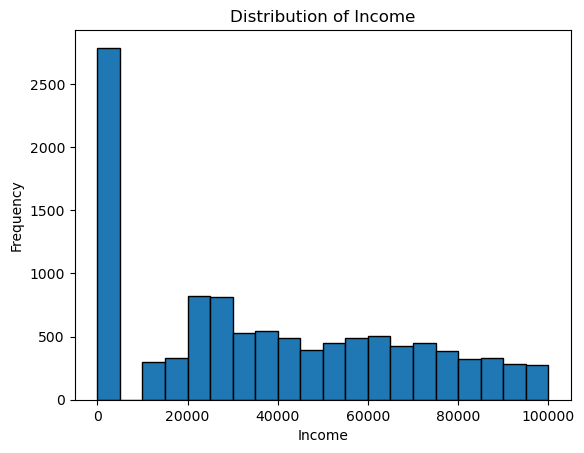

C:\Users\joelk\AppData\Local\Temp\ipykernel_27436\2350360558.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = marketing_data.corr()


,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
unnamed:_0,1.000000,0.001355,0.008910,0.000863,0.007722,0.012795,0.007108,0.002319,-0.000593,0.004755
customer_lifetime_value,0.001355,1.000000,0.028306,0.403069,0.015683,0.016960,-0.031501,0.016024,0.232626,-0.009234
income,0.008910,0.028306,1.000000,-0.009788,-0.023126,-0.005903,0.006956,-0.009960,-0.354141,-0.000443
monthly_premium_auto,0.000863,0.403069,-0.009788,1.000000,0.008504,0.018953,-0.010066,-0.020505,0.631799,0.007253
months_since_last_claim,0.007722,0.015683,-0.023126,0.008504,1.000000,-0.038155,0.002246,0.007425,0.012728,-0.019359
months_since_policy_inception,0.012795,0.016960,-0.005903,0.018953,-0.038155,1.000000,0.004247,-0.009123,0.003095,0.015163
number_of_open_complaints,0.007108,-0.031501,0.006956,-0.010066,0.002246,0.004247,1.000000,0.003964,-0.011025,-0.004671
number_of_policies,0.002319,0.016024,-0.009960,-0.020505,0.007425,-0.009123,0.003964,1.000000,-0.008923,0.005127
total_claim_amount,-0.000593,0.232626,-0.354141,0.631799,0.012728,0.003095,-0.011025,-0.008923,1.000000,0.001425
month,0.004755,-0.009234,-0.000443,0.007253,-0.019359,0.015163,-0.004671,0.005127,0.001425,1.000000


In [18]:
import matplotlib.pyplot as plt

# Example: Visualize the distribution of a key variable (e.g., income)
plt.hist(marketing_data['income'], bins=20, edgecolor='black')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Example: Correlation analysis between numerical features
correlation_matrix = marketing_data.corr()
correlation_matrix


In [19]:
# Save the cleaned combined data to a CSV file
combined_data.to_csv('combined_cleaned_data.csv', index=False)

# Save the structured marketing data to a CSV file
marketing_data.to_csv('structured_marketing_data.csv', index=False)


In [20]:
# Save the cleaned combined data to a CSV file
combined_data.to_csv('combined_cleaned_data.csv', index=False)

# Save the structured marketing data to a CSV file
marketing_data.to_csv('structured_marketing_data.csv', index=False)


1. You work at the marketing department and you want to know which sales channel brought the most sales in terms of total revenue. Using pivot, create a summary table showing the total revenue for each sales channel (branch, call center, web, and mail).
Round the total revenue to 2 decimal points.  Analyze the resulting table to draw insights.

In [21]:
# Create the pivot table for total revenue by sales channel
sales_channel_pivot = marketing_data.pivot_table(
    values='total_claim_amount', 
    index='sales_channel', 
    aggfunc='sum'
).round(2)

# Display the pivot table
sales_channel_pivot


,total_claim_amount
sales_channel,
Agent,1810226.82
Branch,1301204.00
Call Center,926600.82
Web,706600.04


2. Create a pivot table that shows the average customer lifetime value per gender and education level. Analyze the resulting table to draw insights.

In [22]:
# Create the pivot table for average customer lifetime value by gender and education level
clv_pivot = marketing_data.pivot_table(
    values='customer_lifetime_value', 
    index='gender', 
    columns='education', 
    aggfunc='mean'
).round(2)

# Display the pivot table
clv_pivot


education,Bachelor,College,Doctor,High School or Below,Master
gender,,,,,
F,7874.27,7748.82,7328.51,8675.22,8157.05
M,7703.60,8052.46,7415.33,8149.69,8168.83


## Bonus

You work at the customer service department and you want to know which months had the highest number of complaints by policy type category. Create a summary table showing the number of complaints by policy type and month.
Show it in a long format table.

*In data analysis, a long format table is a way of structuring data in which each observation or measurement is stored in a separate row of the table. The key characteristic of a long format table is that each column represents a single variable, and each row represents a single observation of that variable.*

*More information about long and wide format tables here: https://www.statology.org/long-vs-wide-data/*

In [ ]:
# Your code goes here